In [68]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from pathlib import Path
import seaborn as sns

In [12]:
data=pd.read_csv('C:/Users/m8rqu/Documents/Data BootCamp/Video Games Data/Video Game and Crime Data.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
2,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
3,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,15.00,4.89,0.24,1.69,21.81,61.0,45.0,6.3,106.0,Good Science Studio,E
4,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E


In [13]:
data['Platform'].value_counts()

PS2     1456
DS      1255
X360    1030
Wii      977
PS3      935
PC       758
XB       714
PSP      536
GBA      514
GC       457
PS4      255
3DS      223
PS       204
XOne     186
PSV      150
WiiU     105
DC        14
Name: Platform, dtype: int64

In [65]:
gamers_genre = data.groupby(['Genre'])['Critic_Score']
gamers_genre.mean()

Genre
Action          66.670114
Adventure       64.950331
Fighting        69.190594
Misc            66.680473
Platform        68.124490
Puzzle          67.224771
Racing          67.940111
Role-Playing    72.651099
Shooter         70.268770
Simulation      68.577259
Sports          72.064236
Strategy        72.333333
Name: Critic_Score, dtype: float64

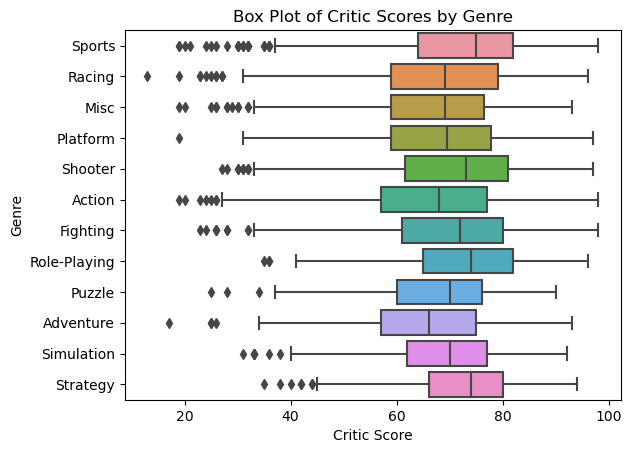

In [69]:
grouped = data.groupby('Genre')['Critic_Score']

# Create a box plot
sns.boxplot(data=data, x='Critic_Score', y='Genre')

# Customize the plot
plt.xlabel('Critic Score')
plt.title('Box Plot of Critic Scores by Genre')

# Show the plot
plt.show()

In [86]:
game_developer_score =  data.groupby(['Developer'])['Critic_Score'].mean()

game_developer_sales = data.groupby(['Developer'])['Global_Sales'].sum()


In [89]:
# Sort the result in descending order and select the top ten
top_ten_developers = game_developer_score.sort_values(ascending=False).head(10)

# Print the top ten developers
print(top_ten_developers)

Developer
Irrational Games, 2K Marin              96.000000
Kojima Productions, Moby Dick Studio    94.000000
Digital Extremes, 2K Marin              94.000000
Bungie Software                         93.666667
DMA Design, Rockstar North              93.000000
Rockstar North                          92.857143
ThatGameCompany                         92.000000
Irrational Games                        91.500000
Valve Software                          91.384615
Headgate                                91.000000
Name: Critic_Score, dtype: float64


In [95]:
# Filter the data for the top ten developers
top_developers_sales = data[data['Developer'].isin(top_ten_developers.index)]

# Group the filtered data by 'Developer' and calculate the total 'Global_Sales'
developer_sales = top_developers_sales.groupby('Developer')['Global_Sales'].sum()
developer_sales.sort_values(ascending=False)

Developer
Rockstar North                          119.47
Valve Software                           19.14
Bungie Software                          15.61
Kojima Productions, Moby Dick Studio      4.98
Irrational Games                          4.31
Irrational Games, 2K Marin                3.24
Digital Extremes, 2K Marin                1.42
ThatGameCompany                           0.21
DMA Design, Rockstar North                0.01
Headgate                                  0.01
Name: Global_Sales, dtype: float64

In [40]:
nintendo_platform = data[data['Developer'] == 'Nintendo'].groupby(['Platform'])['Critic_Score'].median()
nintendo_platform

Platform
3DS     78.0
DS      84.0
GBA     77.0
GC      87.0
Wii     80.0
WiiU    82.5
Name: Critic_Score, dtype: float64

In [42]:
nintendo_platform_sales = data.groupby(['Platform'])['Global_Sales'].sum()
nintendo_platform_sales

Platform
3DS      131.98
DC         4.55
DS       559.25
GBA      188.79
GC       171.56
PC       204.47
PS       234.41
PS2     1044.11
PS3      837.19
PS4      245.99
PSP      212.29
PSV       34.69
Wii      795.28
WiiU      67.57
X360     900.46
XB       228.25
XOne     134.20
Name: Global_Sales, dtype: float64